In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import seaborn as sns
import numpy as np
import plotly.express as px
import geopandas as gpd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer




In [4]:
caloric = pd.read_csv("data/daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv")
emissions =pd.read_csv("data/food-emissions-supply-chain.csv")
meat = pd.read_csv ("data/per-capita-meat-consumption-by-type-kilograms-per-year.csv")
ghg = pd.read_csv("data/ghg-per-kg-poore.csv")
co2 = pd.read_csv("data/owid-co2-data.csv")
countries = pd.read_csv("data/countries.csv")
diet = pd.read_csv("data/dietary-composition-by-country.csv")

# Data cleaning

# EDA

### co2


In [4]:
# Display basic information about the dataset
print(co2.info())

# Display the first few rows of the dataset
print(co2.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 39495 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-null  float64
 10  co2_including_luc     

In [5]:
# Check for missing values in the dataset
missing_values = co2.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)


iso_code                        8341
population                      8563
gdp                            33494
cement_co2                     24294
cement_co2_per_capita          26041
                               ...  
temperature_change_from_n2o    10438
total_ghg                      41704
total_ghg_excluding_lucf       41704
trade_co2                      43660
trade_co2_share                43661
Length: 77, dtype: int64


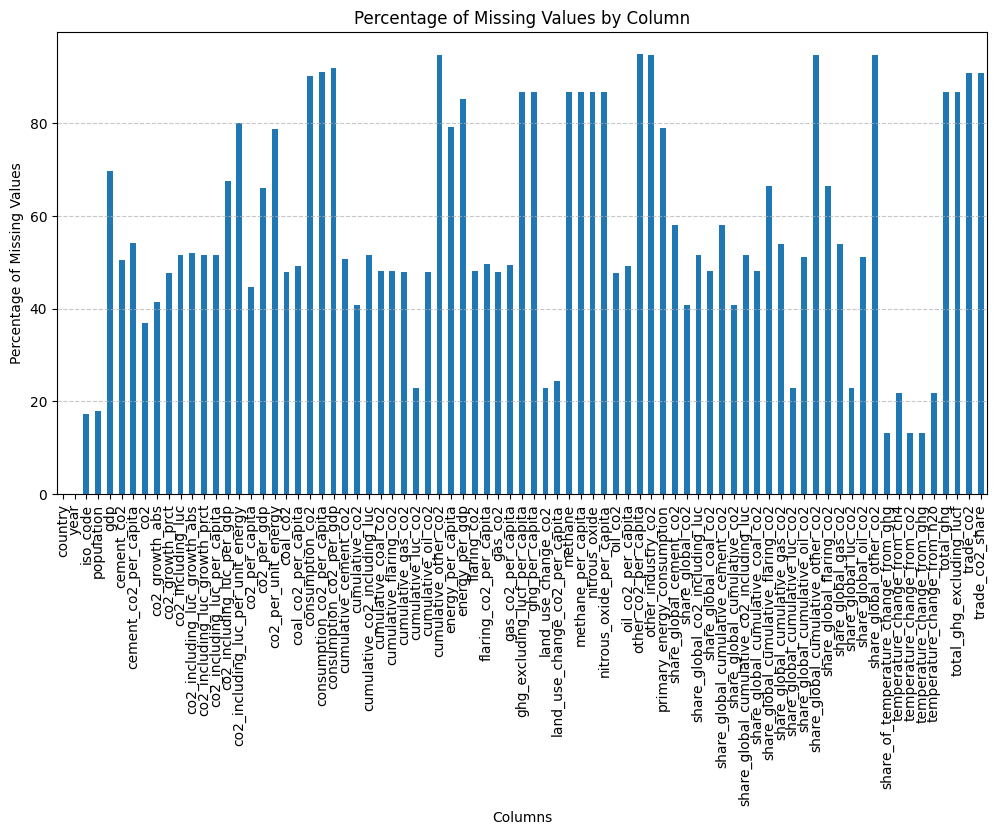

In [6]:
# Calculate the percentage of missing values in each column
missing_percentage = (co2.isnull().sum() / len(co2)) * 100

# Plot the distribution of missing values
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [7]:
# Summary statistics for numerical variables in the CO2 dataset
summary_statistics = co2.describe()

# Display the summary statistics
print(summary_statistics)


               year    population           gdp    cement_co2  \
count  48058.000000  3.949500e+04  1.456400e+04  23764.000000   
mean    1926.842565  6.083223e+07  2.677586e+11      9.109400   
std       59.414846  3.285867e+08  2.103151e+12     66.463548   
min     1750.000000  2.220000e+02  4.998000e+07      0.000000   
25%     1883.000000  3.464375e+05  7.516679e+09      0.000000   
50%     1930.000000  2.456362e+06  2.597999e+10      0.029000   
75%     1976.000000  1.008038e+07  1.132942e+11      0.834000   
max     2022.000000  7.975105e+09  1.136302e+14   1692.404000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           22017.000000  30308.000000    28157.000000     25136.000000   
mean                0.066798    391.272161        5.868310        20.055703   
std                 0.125367   1855.824655       59.845871       687.366449   
min                 0.000000      0.000000    -2032.366000      -100.000000   
25%                

count: Number of non-null values in each column.
mean: Mean of the values in each column.
std: Standard deviation of the values in each column.
min: Minimum value in each column.
25%: 25th percentile (Q1) of the values in each column.
50%: Median (50th percentile or Q2) of the values in each column.
75%: 75th percentile (Q3) of the values in each column.
max: Maximum value in each column.
Here are some observations based on the summary statistics:

The number of non-null values varies for different columns, indicating missing data.
The mean, standard deviation, minimum, maximum, and quartile values provide insights into the distribution and range of each numerical variable.
For some variables, such as population, GDP, and CO2 emissions, the range of values is quite large, indicating variability across countries and years.
The standard deviation reflects the dispersion of values around the mean for each variable.

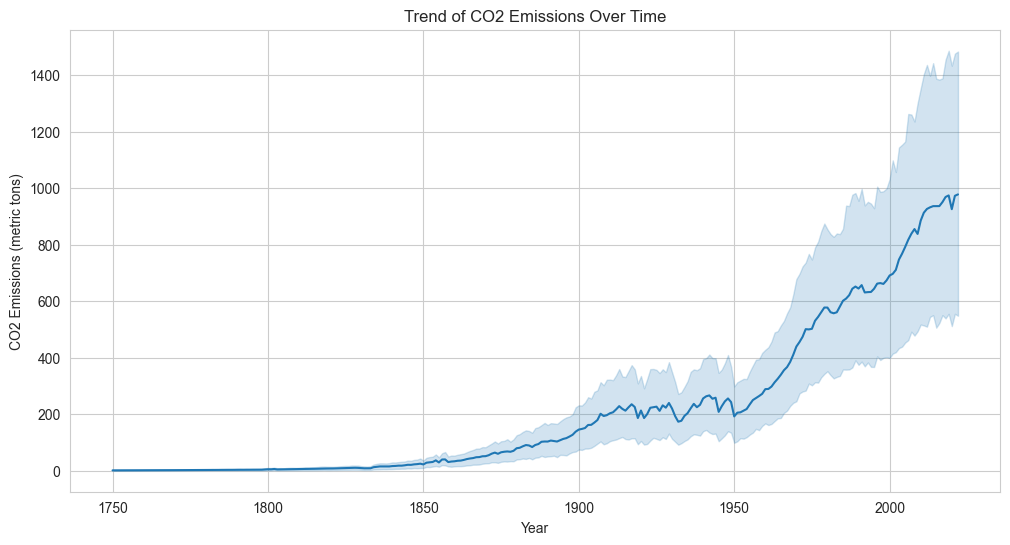

In [8]:
# Set the style
sns.set_style("whitegrid")

# Plot CO2 emissions over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=co2, x='year', y='co2')
plt.title('Trend of CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tons)')
plt.show()


In [9]:
co2_merged = pd.merge(co2, countries, how='left', left_on='country', right_on='name')


/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_1625/3285086267.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=co2_merged, x='year', y='co2', hue='region', ci=None, markers=True, dashes=False, markersize=5)


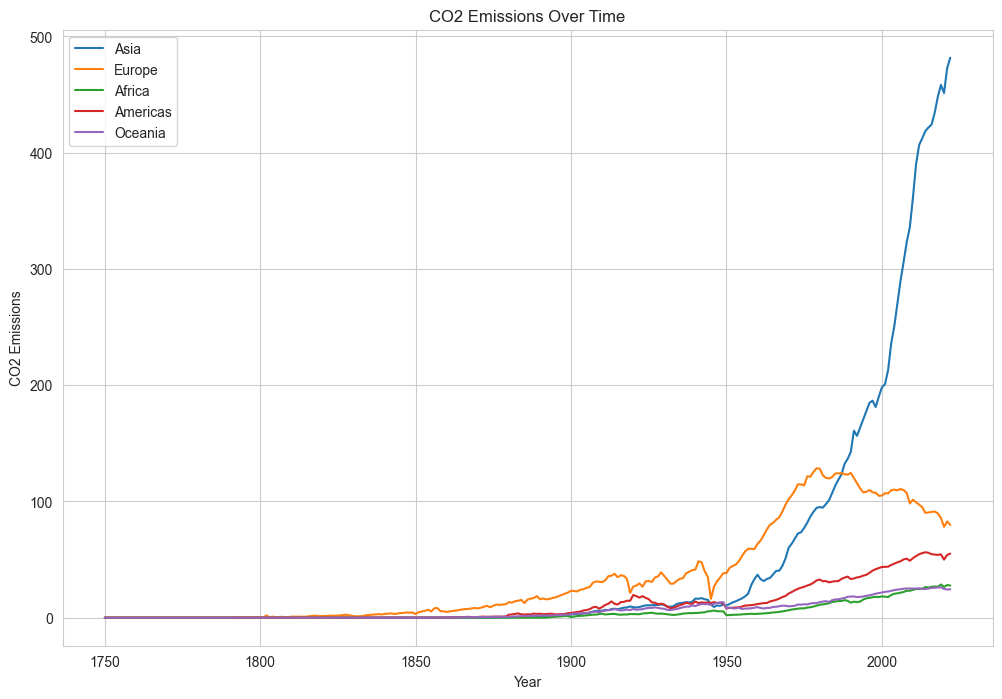

In [10]:
# Set the color palette 
sns.set_palette("tab10")

# Plot the CO2 emissions over time colored by continent
plt.figure(figsize=(12, 8))
sns.lineplot(data=co2_merged, x='year', y='co2', hue='region', ci=None, markers=True, dashes=False, markersize=5)
plt.title('CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend().set_visible(True)  # Show legend

plt.show()



The plot shows the trend of CO2 emissions over time. The x-axis represents the years, and the y-axis represents the amount of CO2 emissions in million metric tons. In this particular plot:



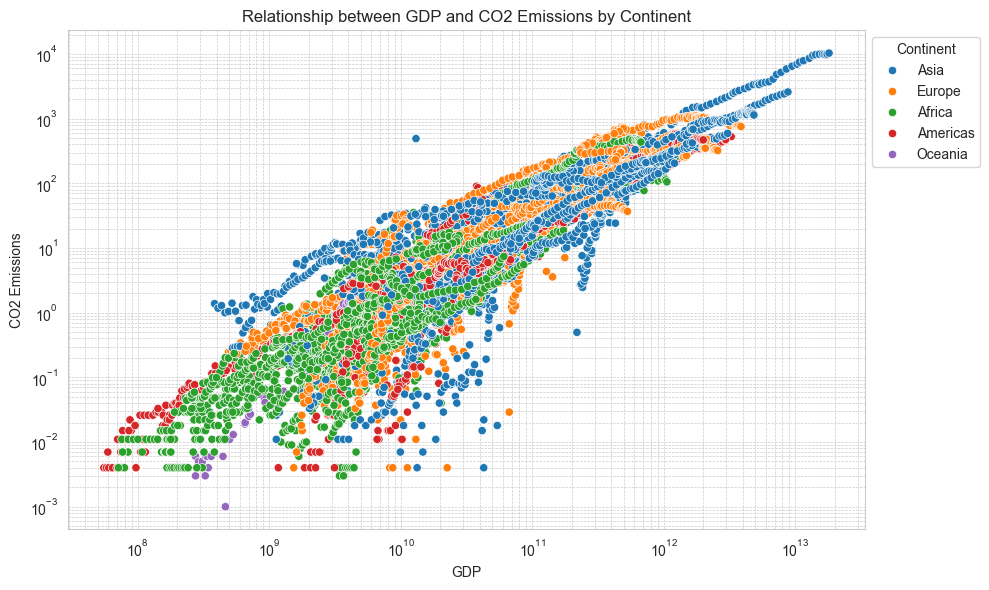

In [11]:
# Plot the relationship between GDP and CO2 emissions by continent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=co2_merged, x='gdp', y='co2', hue='region', palette='tab10')
plt.title('Relationship between GDP and CO2 Emissions by Continent')
plt.xlabel('GDP')
plt.ylabel('CO2 Emissions')
plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.yscale('log')  # Set y-axis to logarithmic scale for better visualization
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines
plt.tight_layout()
plt.show()


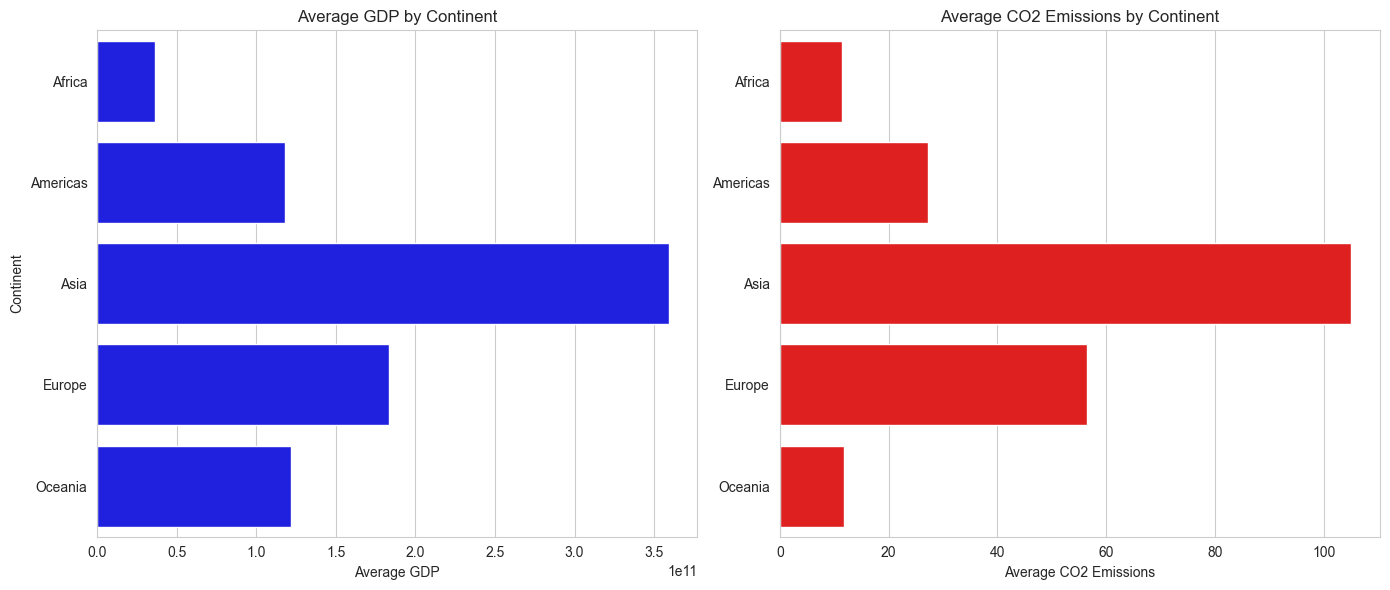

In [12]:
# Calculate the average GDP and CO2 emissions for each continent
average_data = co2_merged.groupby('region').agg({'gdp': 'mean', 'co2': 'mean'}).reset_index()

# Plot the average GDP and CO2 emissions by continent side by side
plt.figure(figsize=(14, 6))

# Plot average GDP
plt.subplot(1, 2, 1)
sns.barplot(data=average_data, x='gdp', y='region', color='blue')
plt.title('Average GDP by Continent')
plt.xlabel('Average GDP')
plt.ylabel('Continent')

# Plot average CO2 emissions
plt.subplot(1, 2, 2)
sns.barplot(data=average_data, x='co2', y='region', color='red')
plt.title('Average CO2 Emissions by Continent')
plt.xlabel('Average CO2 Emissions')
plt.ylabel('')

plt.tight_layout()
plt.show()


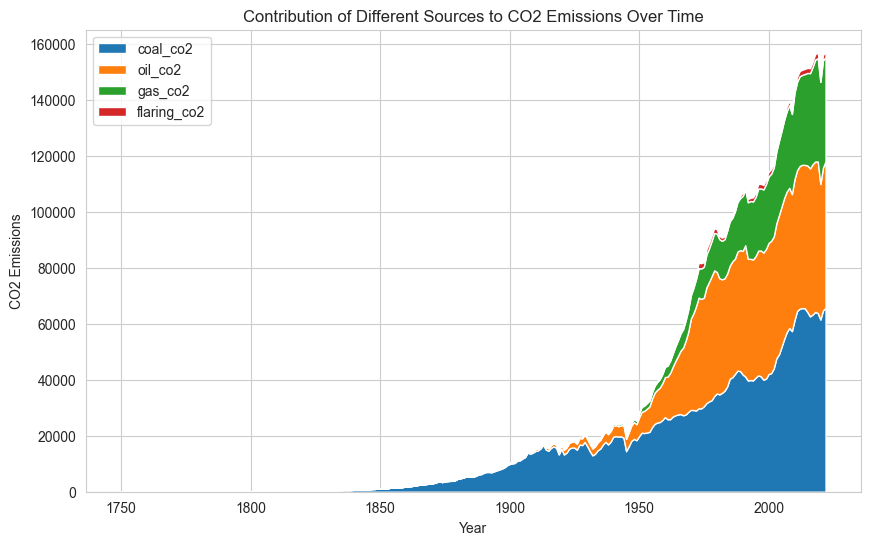

In [13]:
sources = ['coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2']

# Selecting relevant columns from the CO2 dataset
co2_sources = co2[['year'] + sources].groupby('year').sum().reset_index()

# Plotting a stacked area plot with legend
plt.figure(figsize=(10, 6))
plt.stackplot(co2_sources['year'], co2_sources[sources].values.T, labels=sources)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title('Contribution of Different Sources to CO2 Emissions Over Time')
plt.legend(loc='upper left')
plt.show()


I show how the contributions of coal, oil, gas, and flaring change over the years

In [14]:
# Replace missing values with NaN
co2.replace("", np.nan, inplace=True)

# Extract the independent variable (features) and dependent variable (CO2 emissions)
X = co2[['land_use_change_co2', 'cumulative_luc_co2']]  # Independent variables (features)
y = co2['co2']  # Dependent variable (CO2 emissions)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Check for NaN values in y_train
nan_indices = np.isnan(y_train)
if np.any(nan_indices):
    # Remove corresponding rows from both X_train_imputed and y_train
    X_train_imputed = X_train_imputed[~nan_indices]
    y_train = y_train[~nan_indices]

# Check for NaN values in y_test
nan_indices = np.isnan(y_test)
if np.any(nan_indices):
    # Remove corresponding rows from both X_test_imputed and y_test
    X_test_imputed = X_test_imputed[~nan_indices]
    y_test = y_test[~nan_indices]

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1490422.1908378124
R-squared Score: 0.591718644434643


### Emissions

In [15]:
# Define a dictionary mapping old column names to new column names
column_rename_dict = {
    'food_emissions_land_use': 'f.e_land_use',
    'food_emissions_farm': 'f.e_farm',
    'food_emissions_animal_feed': 'f.e_animal_feed',
    'food_emissions_processing': 'f.e_processing',
    'food_emissions_transport': 'f.e_transport',
    'food_emissions_retail': 'f.e_retail',
    'food_emissions_packaging': 'f.e_packaging',
    'food_emissions_losses': 'f.e_losses'
}

# Rename the columns using the rename() function
emissions.rename(columns=column_rename_dict, inplace=True)


In [16]:
# Displaying the first few rows of the dataset
print(emissions.head())

# Checking the shape of the dataset
print("\nShape of the dataset:", emissions.shape)

# Displaying summary statistics
print("\nSummary statistics of the dataset:")
print(emissions.describe())

# Checking for missing values
print("\nMissing values in the dataset:")
print(emissions.isnull().sum())


              Entity  Code  Year  f.e_land_use   f.e_farm  f.e_animal_feed  \
0             Apples   NaN  2018     -0.028951   0.225816         0.000000   
1            Bananas   NaN  2018     -0.025534   0.269618         0.000000   
2             Barley   NaN  2018      0.008676   0.176377         0.000000   
3   Beef (beef herd)   NaN  2018     23.237536  56.228063         2.680979   
4  Beef (dairy herd)   NaN  2018      1.266022  21.915529         3.503673   

   f.e_processing  f.e_transport  f.e_retail  f.e_packaging  f.e_losses  
0        0.003820       0.095804    0.016578       0.044526    0.070808  
1        0.060146       0.295830    0.020981       0.065670    0.175185  
2        0.127703       0.035351    0.263587       0.496786    0.070692  
3        1.811083       0.494125    0.233538       0.352084   14.439998  
4        1.547664       0.592410    0.254032       0.374549    3.847515  

Shape of the dataset: (43, 11)

Summary statistics of the dataset:
       Code    Year

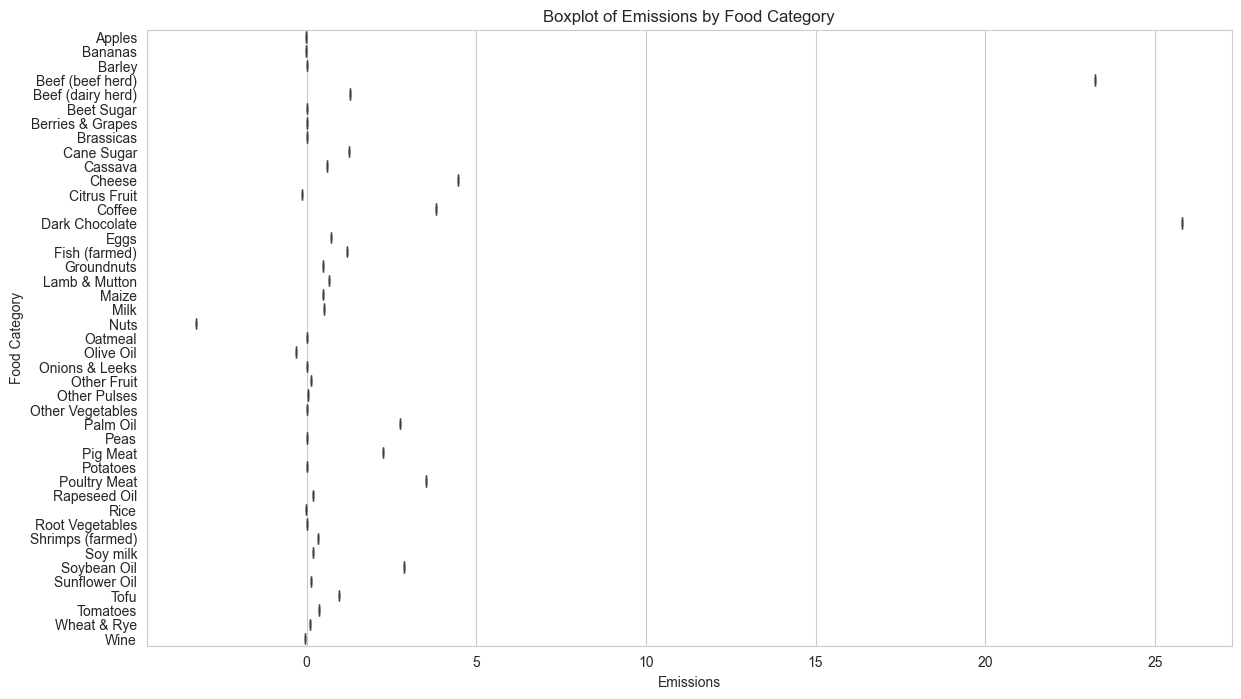

In [17]:
# Boxplot of Emissions by Food Category
plt.figure(figsize=(14, 8))
sns.boxplot(x='f.e_land_use', y='Entity', data=emissions)
plt.title('Boxplot of Emissions by Food Category')
plt.xlabel('Emissions')
plt.ylabel('Food Category')
plt.show()


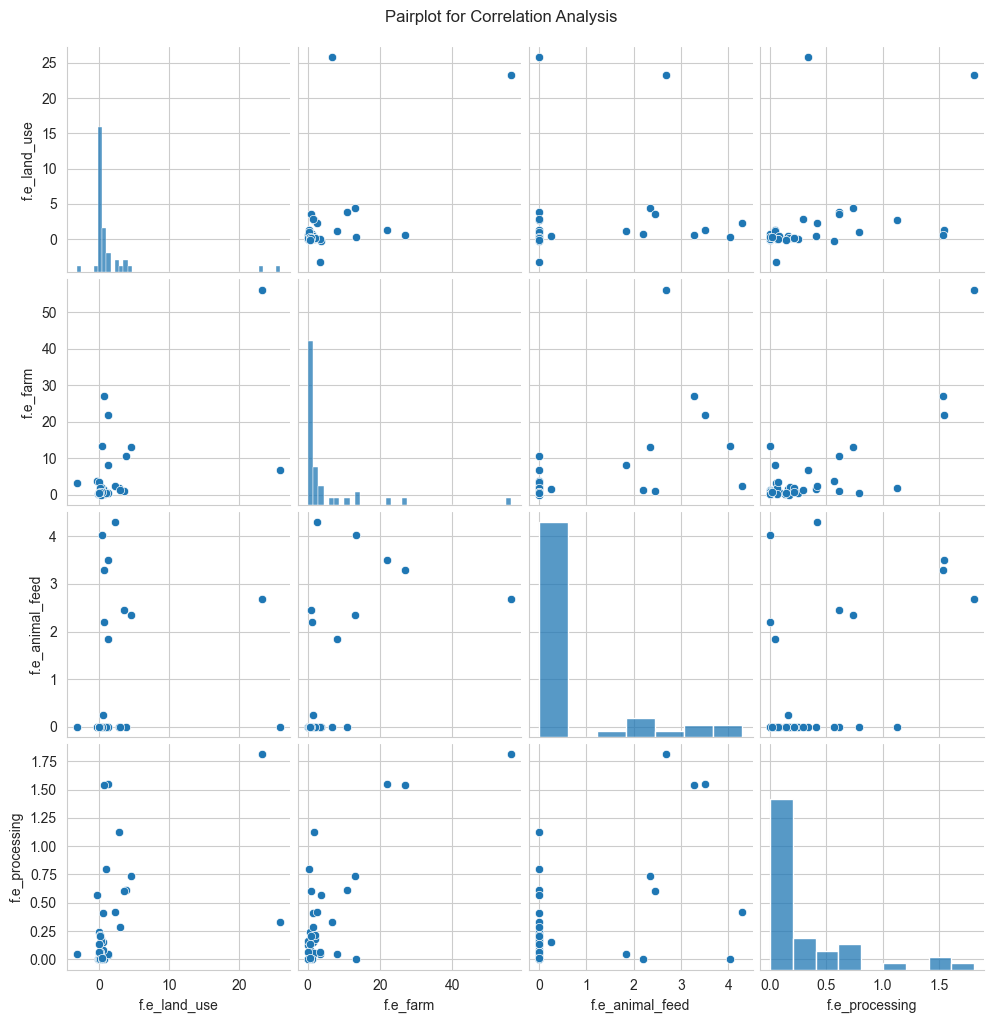

In [18]:
# Pairplot for Correlation Analysis
sns.pairplot(emissions[['f.e_land_use', 'f.e_farm', 'f.e_animal_feed', 'f.e_processing']])
plt.suptitle('Pairplot for Correlation Analysis', y=1.02)
plt.show()


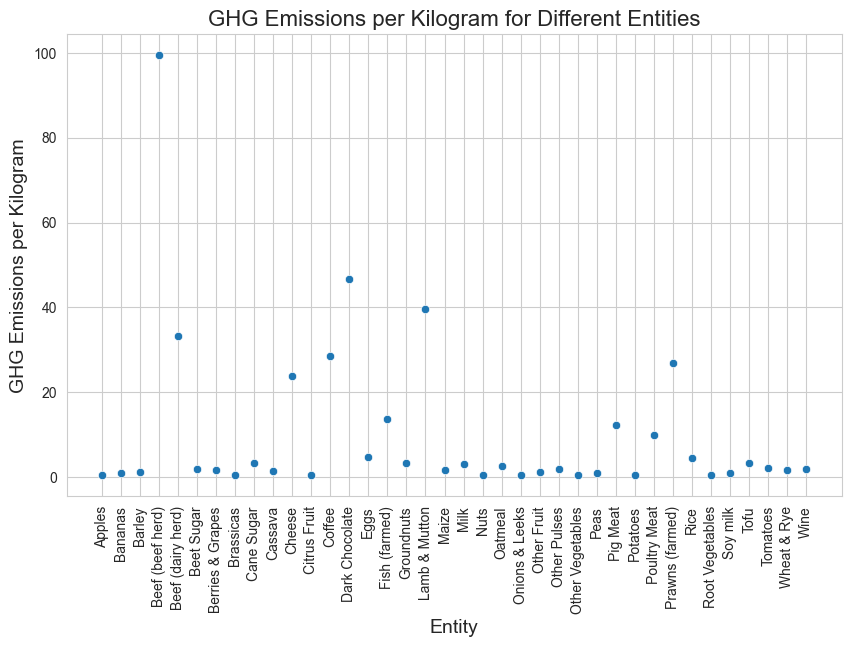

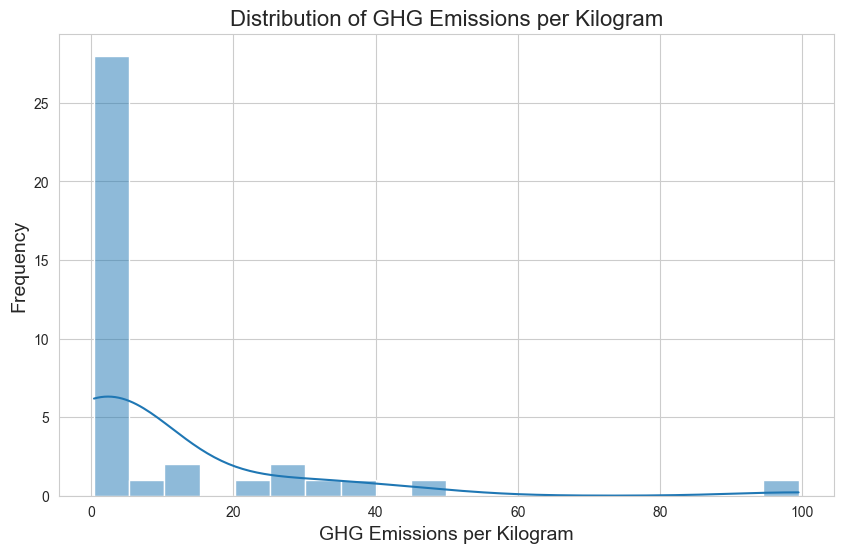

In [19]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ghg, x='Entity', y='GHG emissions per kilogram (Poore & Nemecek, 2018)')
plt.title('GHG Emissions per Kilogram for Different Entities', fontsize=16)
plt.xlabel('Entity', fontsize=14)
plt.ylabel('GHG Emissions per Kilogram', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data=ghg, x='GHG emissions per kilogram (Poore & Nemecek, 2018)', kde=True, bins=20)
plt.title('Distribution of GHG Emissions per Kilogram', fontsize=16)
plt.xlabel('GHG Emissions per Kilogram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [20]:
# Melt the dataframe for easier plotting
emissions_melted = pd.melt(emissions, id_vars=['Entity', 'Year'], var_name='Category', value_name='Emissions')

# Create an interactive line plot with hover information
fig = px.line(emissions_melted, x='Category', y='Emissions', color='Entity', line_group='Entity',
              labels={'Entity': 'Entity', 'Emissions': 'Emissions'},
              title='Emissions Over Time for Different Entities',
              template='plotly_dark')

# Customize axis labels and tick angles for better visibility
fig.update_xaxes(title_text='Emission Categories', tickangle=45)
fig.update_yaxes(title_text='Emissions')

# Show the interactive plot
fig.show()


In [21]:
fig = px.bar(emissions_melted, x='Emissions', y='Entity', color='Category',
             labels={'Emissions': 'Emissions'},
             title='Emissions by Entity and Category',
             width=1200, height=800)  # Set the width and height

# Sort entities by total emissions in ascending order
sorted_entities = emissions_melted.groupby('Entity')['Emissions'].sum().sort_values().index
fig.update_yaxes(categoryorder='array', categoryarray=sorted_entities)

# Customize the layout for better visibility
fig.update_layout(
    xaxis_title='Emissions (kg)',
    yaxis_title='Entity',
    legend_title='Category',
    legend=dict(orientation='h', yanchor='bottom', y=1.01, xanchor='right', x=1),
    barmode='stack',  # Change to 'group' if you want grouped bars instead of stacked
    autosize=False
)

# Show the updated plot
fig.show()


In [22]:
# Filter entities related to meat and fish
meat_fish_entities = emissions_melted[emissions_melted['Entity'].str.contains('Beef|Pork|Pig|Chicken|Fish|Shrimp')]

# Create the plot
fig = px.bar(meat_fish_entities, x='Emissions', y='Entity', color='Category',
             labels={'Emissions': 'Emissions'},
             title='Emissions by Meat and Fish Entities',
             width=1200, height=800)

# Sort entities by total emissions in ascending order
sorted_entities = meat_fish_entities.groupby('Entity')['Emissions'].sum().sort_values().index
fig.update_yaxes(categoryorder='array', categoryarray=sorted_entities)

# Customize the layout for better visibility
fig.update_layout(
    xaxis_title='Emissions (kg)',
    yaxis_title='Entity',
    legend_title='Category',
    legend=dict(orientation='h', yanchor='bottom', y=1.01, xanchor='right', x=1),
    barmode='stack',  # Change to 'group' if you want grouped bars instead of stacked
    autosize=False
)

# Show the plot
fig.show()


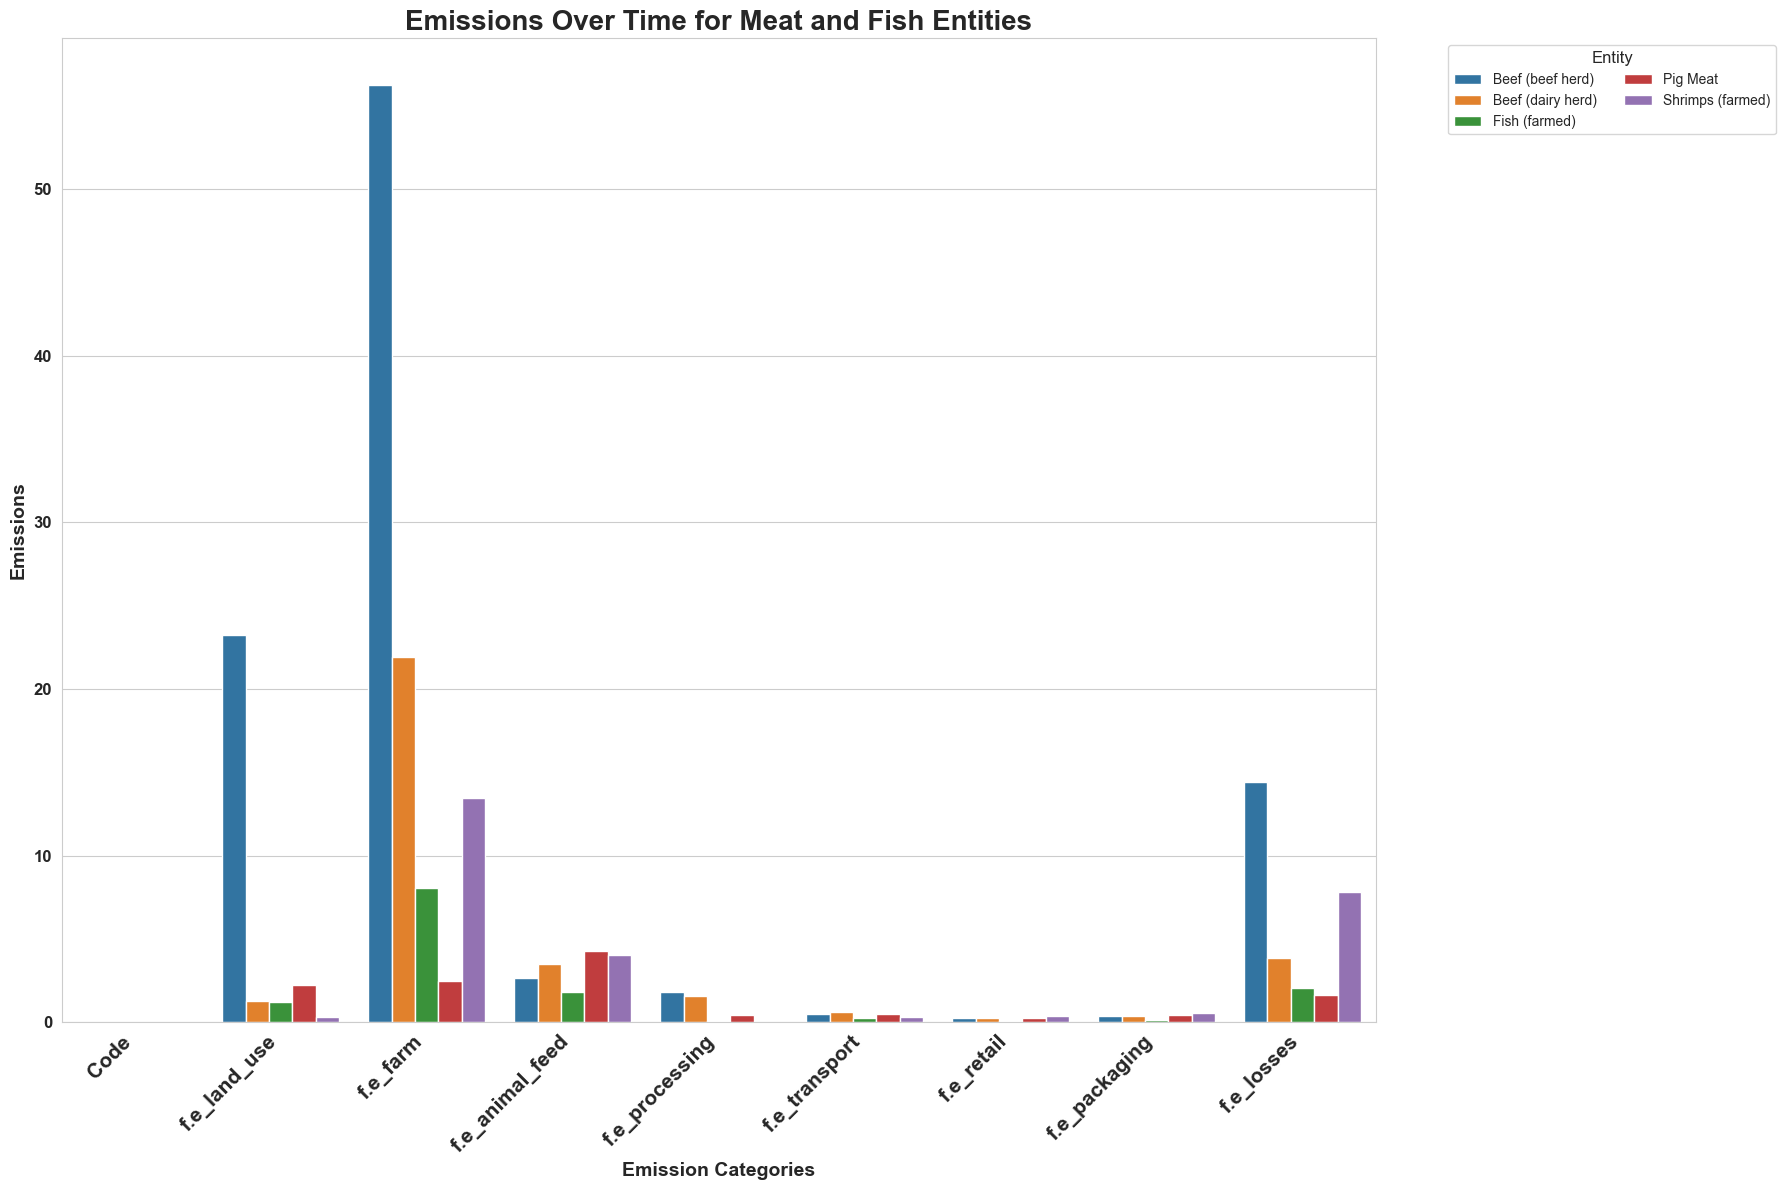

In [23]:
# Filter entities related to meat and fish
meat_fish_entities = emissions_melted[emissions_melted['Entity'].str.contains('Beef|Pork|Pig|Chicken|Fish|Shrimp')]

# Increase the size of the plot
plt.figure(figsize=(18, 12))

# Use a more distinguishable color palette
custom_palette = sns.color_palette("tab10", n_colors=len(meat_fish_entities['Entity'].unique()))

# Bar plot for meat and fish entities
sns.barplot(data=meat_fish_entities, x='Category', y='Emissions', hue='Entity', palette=custom_palette)

plt.title('Emissions Over Time for Meat and Fish Entities', fontsize=20, fontweight='bold')  # Increase title font weight
plt.xlabel('Emission Categories', fontsize=14, fontweight='bold')  # Increase x-axis label font weight
plt.ylabel('Emissions', fontsize=14, fontweight='bold')  # Increase y-axis label font weight
plt.legend(title='Entity', title_fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)  # Adjust legend for better visibility and increase title font size
plt.xticks(rotation=45, ha='right', fontsize=15, fontweight='bold')  # Rotate x-axis labels for better visibility and increase font weight
plt.yticks(fontsize=12, fontweight='bold')  # Increase y-axis labels font weight
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


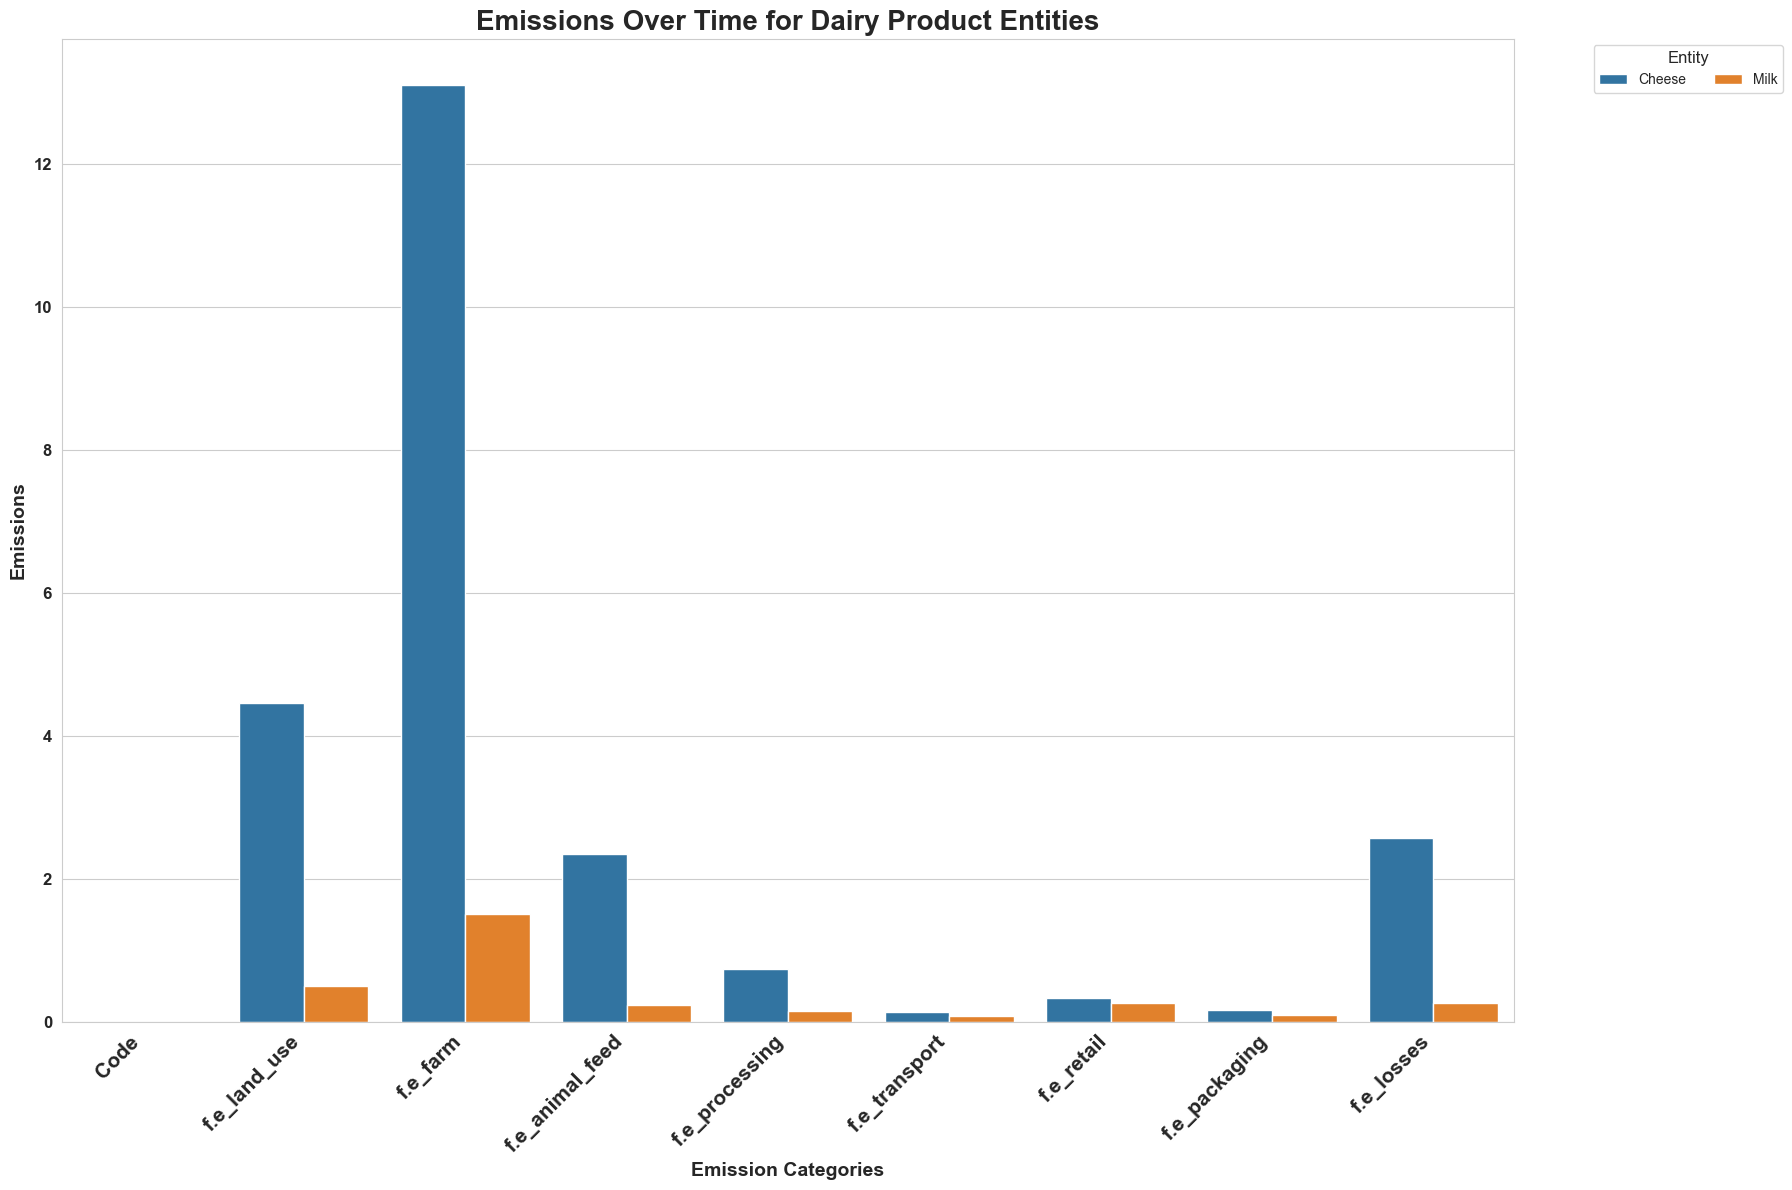

In [24]:
# Filter entities related to dairy products
dairy_entities = emissions_melted[emissions_melted['Entity'].str.contains('Milk|Cheese')]

# Increase the size of the plot
plt.figure(figsize=(18, 12))

# Use a more distinguishable color palette
custom_palette = sns.color_palette("tab10", n_colors=len(dairy_entities['Entity'].unique()))

# Bar plot for dairy product entities
sns.barplot(data=dairy_entities, x='Category', y='Emissions', hue='Entity', palette=custom_palette)

plt.title('Emissions Over Time for Dairy Product Entities', fontsize=20, fontweight='bold')  # Increase title font weight
plt.xlabel('Emission Categories', fontsize=14, fontweight='bold')  # Increase x-axis label font weight
plt.ylabel('Emissions', fontsize=14, fontweight='bold')  # Increase y-axis label font weight
plt.legend(title='Entity', title_fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)  # Adjust legend for better visibility and increase title font size
plt.xticks(rotation=45, ha='right', fontsize=15, fontweight='bold')  # Rotate x-axis labels for better visibility and increase font weight
plt.yticks(fontsize=12, fontweight='bold')  # Increase y-axis labels font weight
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


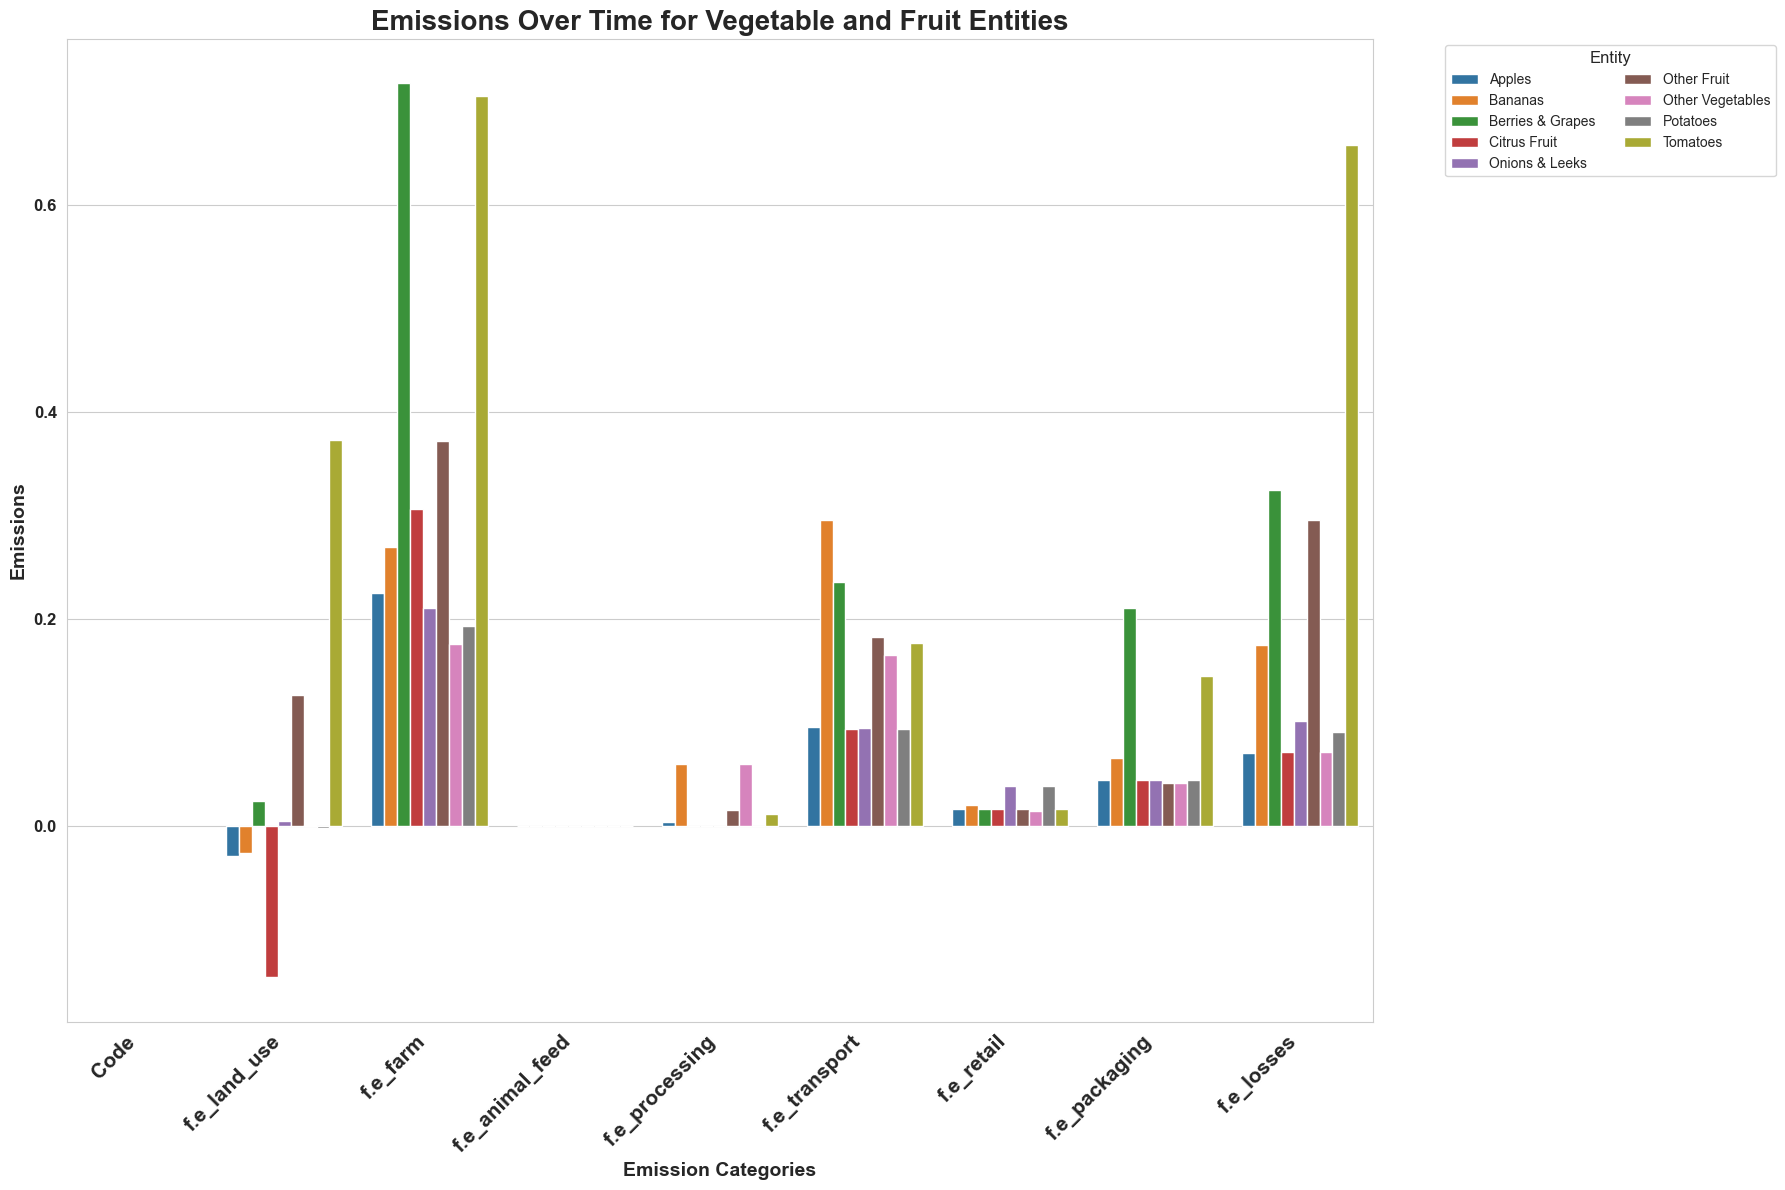

In [25]:
# Filter entities related to vegetables and fruits
veg_fruit_entities = emissions_melted[emissions_melted['Entity'].str.contains('Apples|Bananas|Berries & Grapes|Citrus Fruit|Onions & Leeks|Other Fruit|Other Vegetables|Potatoes|Tomatoes')]

# Increase the size of the plot
plt.figure(figsize=(18, 12))

# Use a more distinguishable color palette
custom_palette = sns.color_palette("tab10", n_colors=len(veg_fruit_entities['Entity'].unique()))

# Bar plot for vegetable and fruit entities
sns.barplot(data=veg_fruit_entities, x='Category', y='Emissions', hue='Entity', palette=custom_palette)

plt.title('Emissions Over Time for Vegetable and Fruit Entities', fontsize=20, fontweight='bold')  # Increase title font weight
plt.xlabel('Emission Categories', fontsize=14, fontweight='bold')  # Increase x-axis label font weight
plt.ylabel('Emissions', fontsize=14, fontweight='bold')  # Increase y-axis label font weight
plt.legend(title='Entity', title_fontsize='large', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)  # Adjust legend for better visibility and increase title font size
plt.xticks(rotation=45, ha='right', fontsize=15, fontweight='bold')  # Rotate x-axis labels for better visibility and increase font weight
plt.yticks(fontsize=12, fontweight='bold')  # Increase y-axis labels font weight
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## GHG 


In [26]:
print(ghg.head())

              Entity  Code  Year  \
0             Apples   NaN  2010   
1            Bananas   NaN  2010   
2             Barley   NaN  2010   
3   Beef (beef herd)   NaN  2010   
4  Beef (dairy herd)   NaN  2010   

   GHG emissions per kilogram (Poore & Nemecek, 2018)  
0                                               0.43   
1                                               0.86   
2                                               1.18   
3                                              99.48   
4                                              33.30   


In [27]:
# Check for missing values
missing_values = ghg.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Entity                                                 0
Code                                                  38
Year                                                   0
GHG emissions per kilogram (Poore & Nemecek, 2018)     0
dtype: int64


In [28]:
ghg_cleaned = ghg.drop(columns=['Code'])


/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_1625/171646257.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




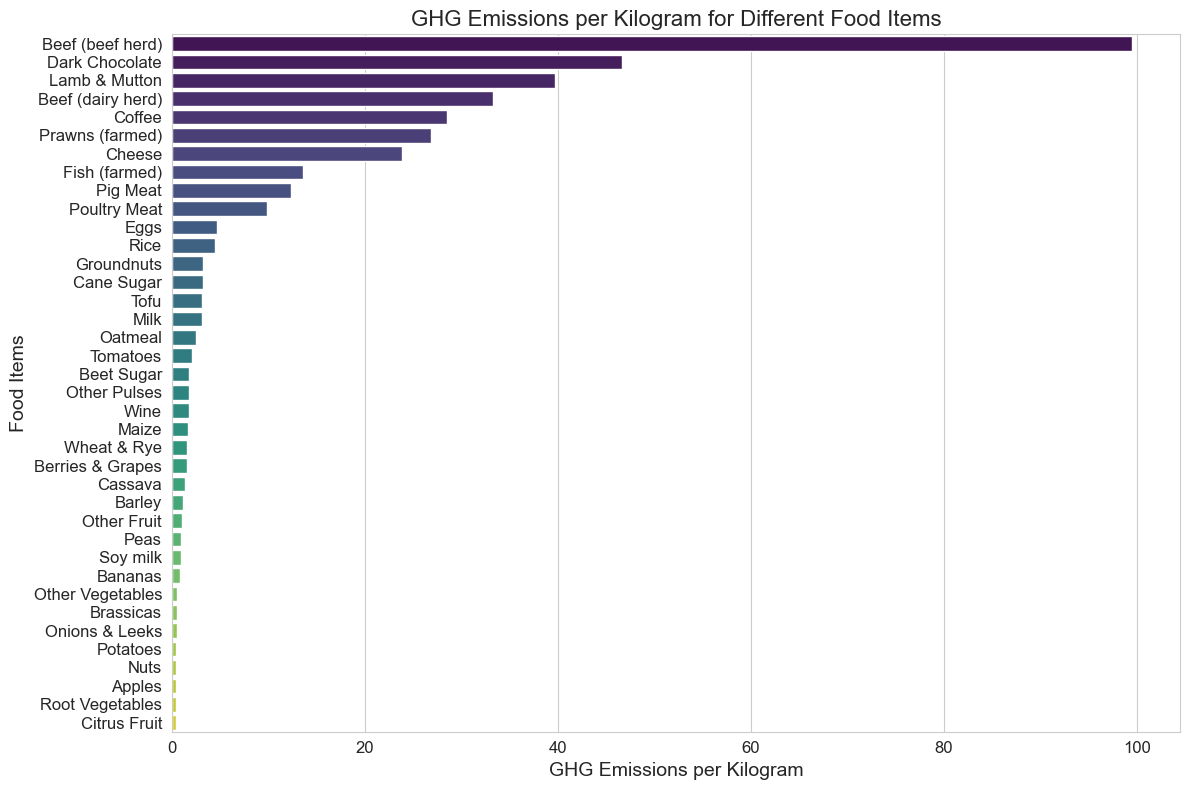

In [29]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Sort the data by GHG emissions per kilogram
ghg_sorted = ghg.sort_values(by='GHG emissions per kilogram (Poore & Nemecek, 2018)', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=ghg_sorted, x='GHG emissions per kilogram (Poore & Nemecek, 2018)', y='Entity', palette='viridis')

# Set the title and labels
plt.title('GHG Emissions per Kilogram for Different Food Items', fontsize=16)
plt.xlabel('GHG Emissions per Kilogram', fontsize=14)
plt.ylabel('Food Items', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


This bar plot will provide us with insights into which food items have the highest GHG emissions per kilogram

/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_1625/1482071723.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




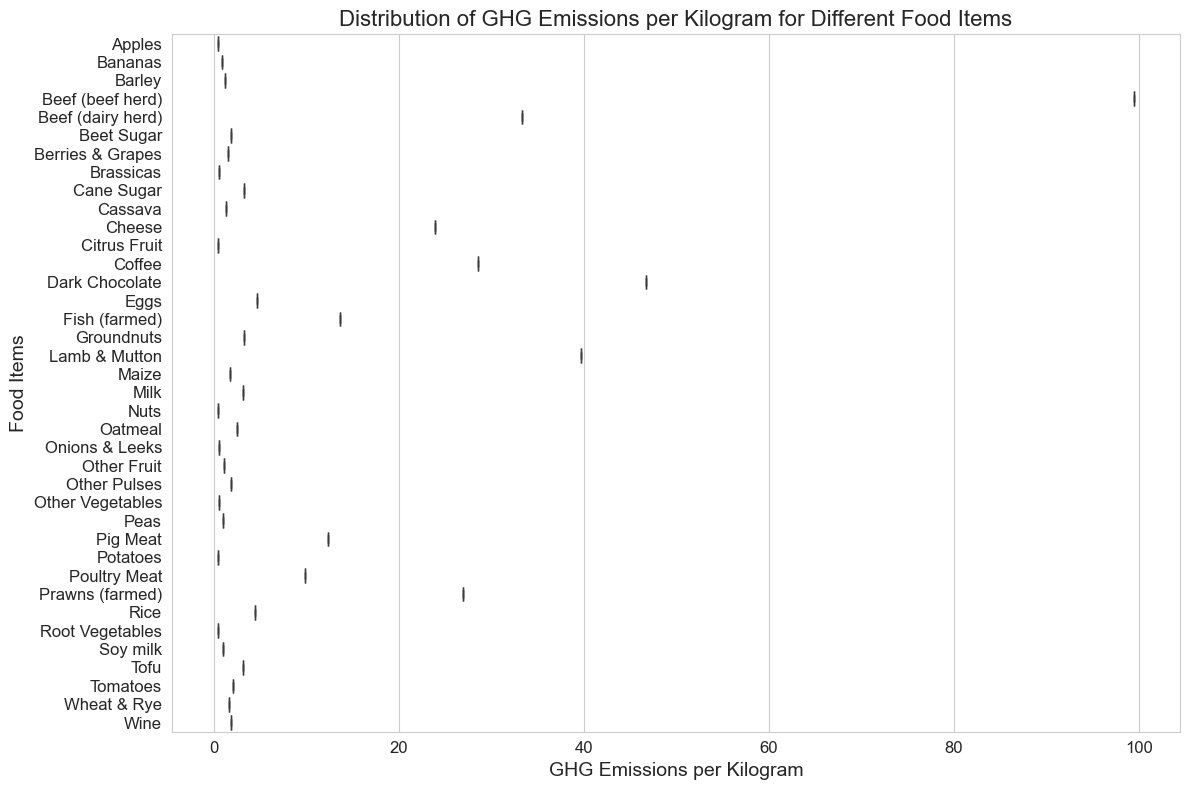

In [30]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=ghg, x='GHG emissions per kilogram (Poore & Nemecek, 2018)', y='Entity', palette='muted')

# Set the title and labels
plt.title('Distribution of GHG Emissions per Kilogram for Different Food Items', fontsize=16)
plt.xlabel('GHG Emissions per Kilogram', fontsize=14)
plt.ylabel('Food Items', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


This box plot will help us visualize the spread of GHG emissions per kilogram for each food item.

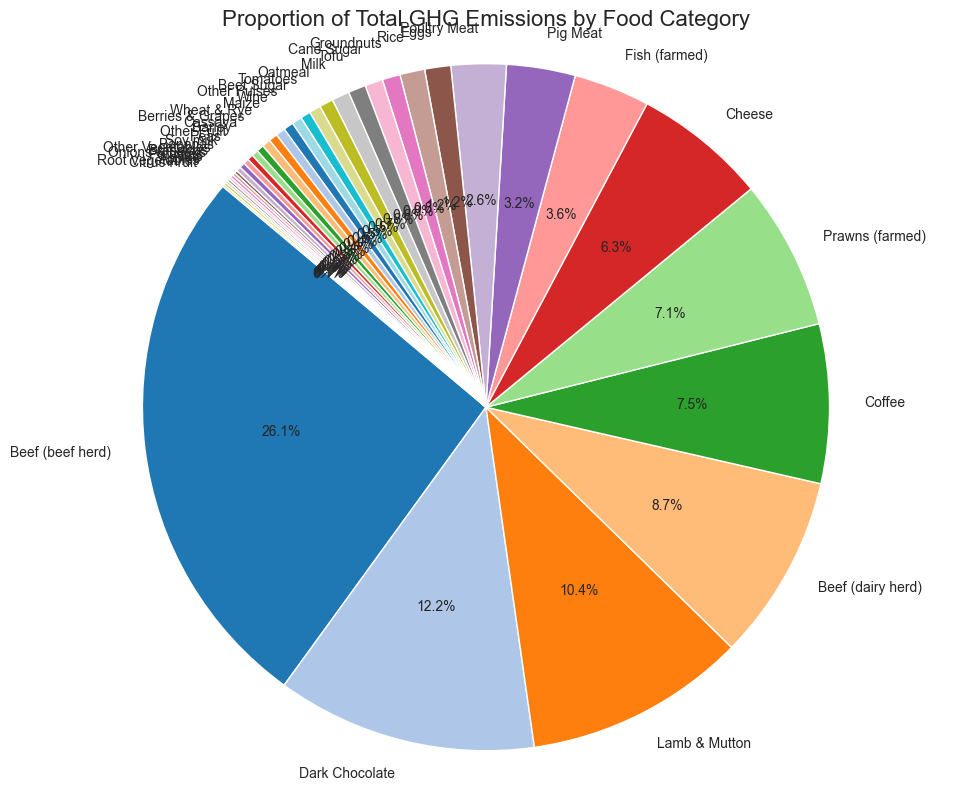

In [31]:
# Calculate the total GHG emissions
total_emissions = ghg['GHG emissions per kilogram (Poore & Nemecek, 2018)'].sum()

# Calculate the proportion of emissions for each food category
ghg['Proportion'] = ghg['GHG emissions per kilogram (Poore & Nemecek, 2018)'] / total_emissions

# Sort the data by proportion in descending order
ghg_sorted = ghg.sort_values(by='Proportion', ascending=False)

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(ghg_sorted['Proportion'], labels=ghg_sorted['Entity'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Set the title
plt.title('Proportion of Total GHG Emissions by Food Category', fontsize=16)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


This pie chart will give us a visual representation of how much each food category contributes to the total GHG emissions.

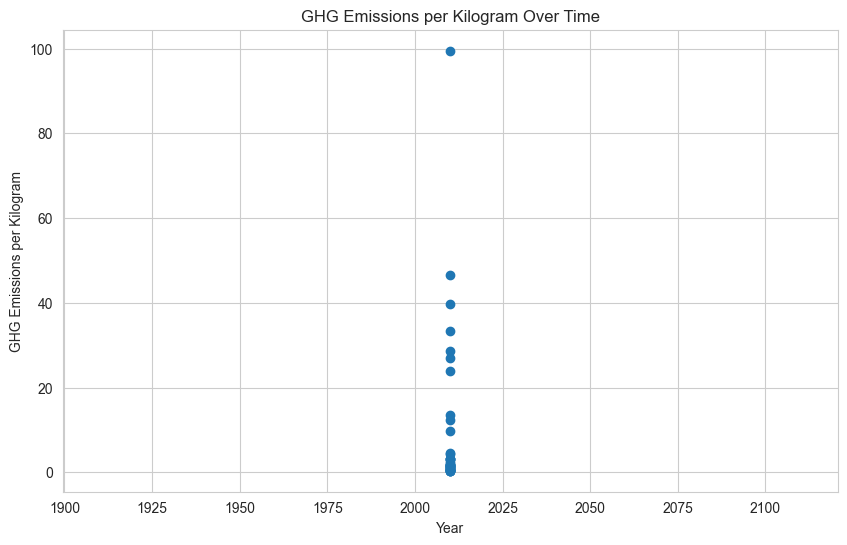

In [32]:
# Scatter plot for GHG emissions per kilogram against the year
plt.figure(figsize=(10, 6))
plt.scatter(ghg['Year'], ghg['GHG emissions per kilogram (Poore & Nemecek, 2018)'])
plt.xlabel('Year')
plt.ylabel('GHG Emissions per Kilogram')
plt.title('GHG Emissions per Kilogram Over Time')
plt.grid(True)
plt.show()


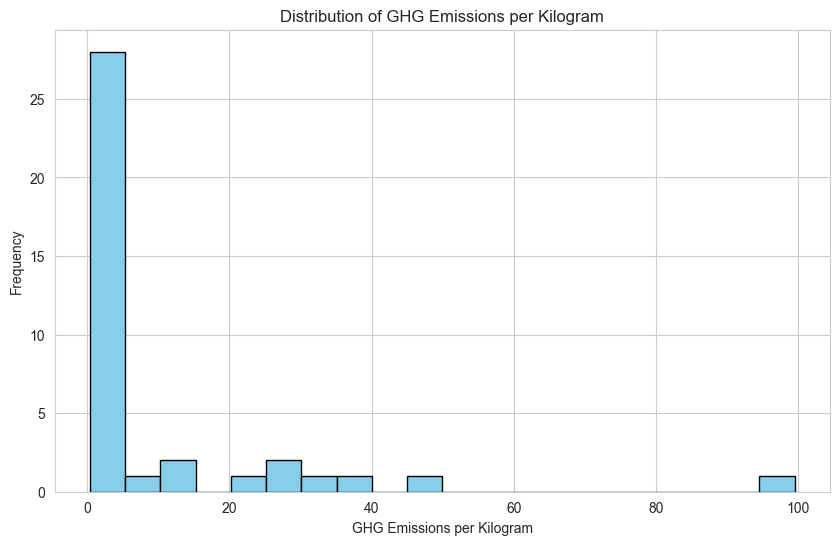

In [33]:
# Histogram for GHG emissions per kilogram
plt.figure(figsize=(10, 6))
plt.hist(ghg['GHG emissions per kilogram (Poore & Nemecek, 2018)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('GHG Emissions per Kilogram')
plt.ylabel('Frequency')
plt.title('Distribution of GHG Emissions per Kilogram')
plt.grid(True)
plt.show()



This code will generate a histogram showing the distribution of GHG emissions per kilogram across different food items

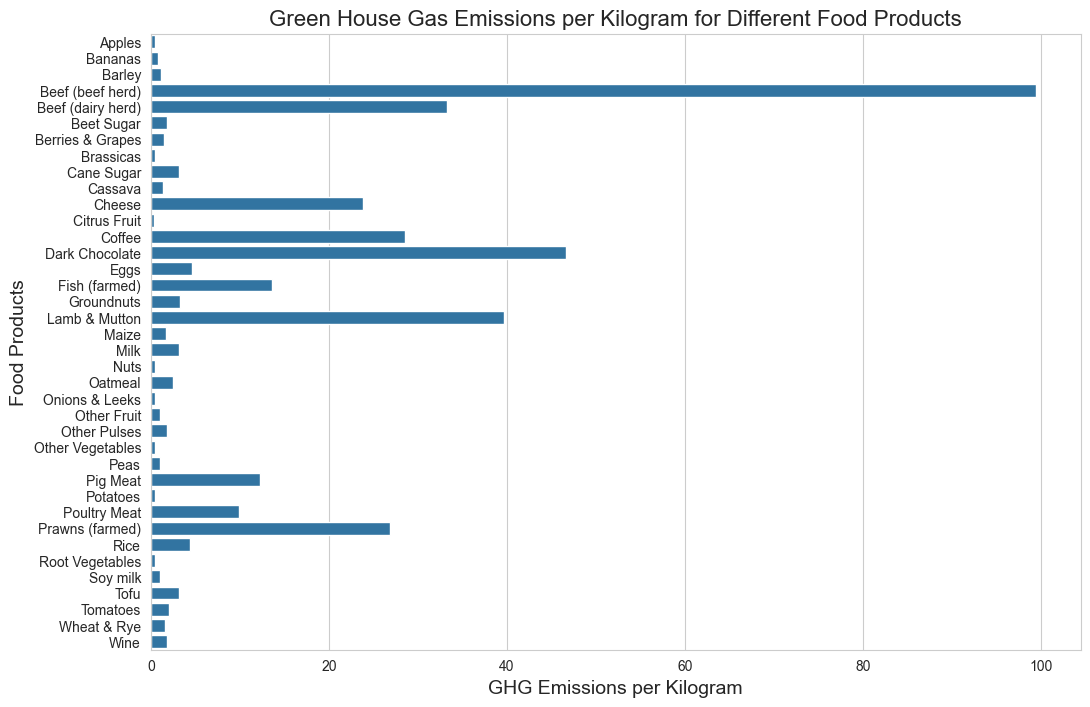

In [34]:

# Set the style of seaborn
sns.set_style('whitegrid')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=ghg, x='GHG emissions per kilogram (Poore & Nemecek, 2018)', y='Entity')
plt.title('Green House Gas Emissions per Kilogram for Different Food Products', fontsize=16)
plt.xlabel('GHG Emissions per Kilogram', fontsize=14)
plt.ylabel('Food Products', fontsize=14)
plt.show()


## Merge emissions & GHG dataset


In [35]:

# Merge the datasets on the 'Entity' column
combined_df = pd.merge(emissions, ghg, on='Entity', how='inner')

# Now combined_df contains the merged dataset with information from both emissions and GHG datasets


In [36]:
# Sum up the emissions from different sources and store the result in a new column
combined_df['total_food_emission'] = combined_df[['f.e_land_use', 'f.e_farm', 'f.e_animal_feed', 
                                                  'f.e_processing', 'f.e_transport', 'f.e_retail', 
                                                  'f.e_packaging', 'f.e_losses']].sum(axis=1)


In [37]:
combined_df.head()

,Entity,Code_x,Year_x,f.e_land_use,f.e_farm,f.e_animal_feed,f.e_processing,f.e_transport,f.e_retail,f.e_packaging,f.e_losses,Code_y,Year_y,"GHG emissions per kilogram (Poore & Nemecek, 2018)",Proportion,total_food_emission
0,Apples,NaN,2018,-0.028951,0.225816,0.000000,0.003820,0.095804,0.016578,0.044526,0.070808,NaN,2010,0.43,0.001129,0.428401
1,Bananas,NaN,2018,-0.025534,0.269618,0.000000,0.060146,0.295830,0.020981,0.065670,0.175185,NaN,2010,0.86,0.002258,0.861896
2,Barley,NaN,2018,0.008676,0.176377,0.000000,0.127703,0.035351,0.263587,0.496786,0.070692,NaN,2010,1.18,0.003098,1.179171
3,Beef (beef herd),NaN,2018,23.237536,56.228063,2.680979,1.811083,0.494125,0.233538,0.352084,14.439998,NaN,2010,99.48,0.261164,99.477405
4,Beef (dairy herd),NaN,2018,1.266022,21.915529,3.503673,1.547664,0.592410,0.254032,0.374549,3.847515,NaN,2010,33.30,0.087422,33.301395


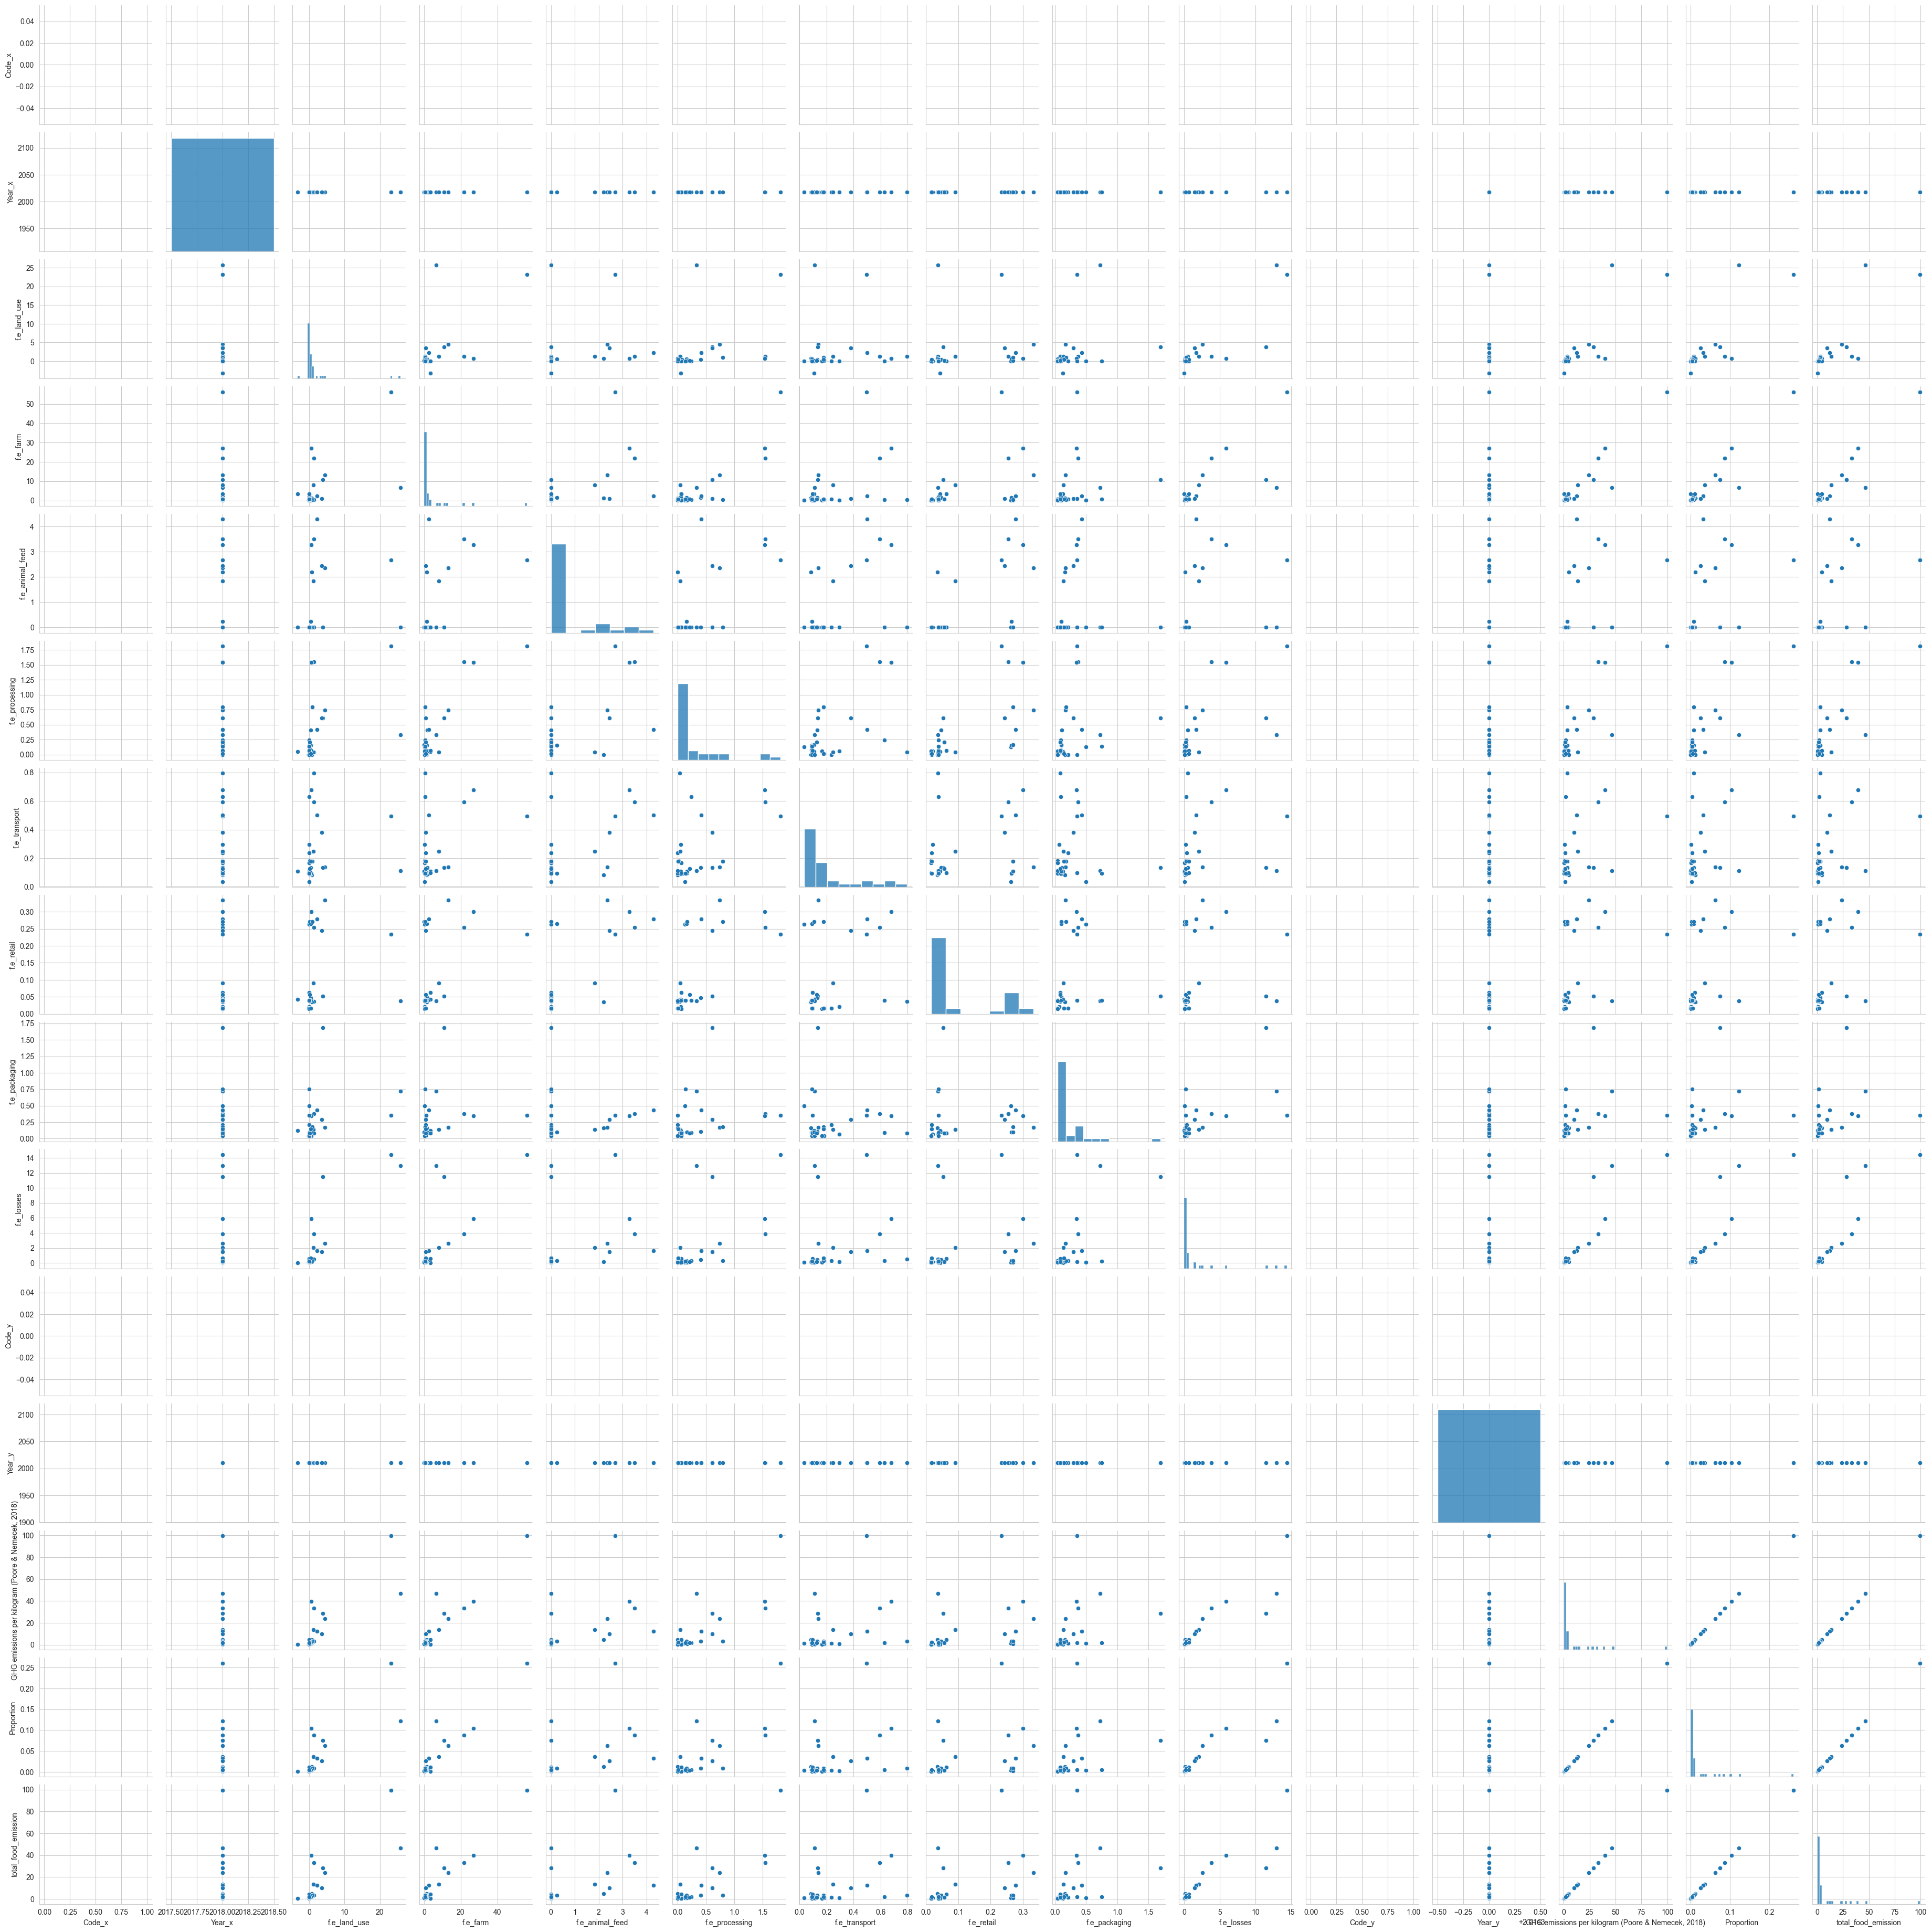

In [38]:
# Creating pair plot
sns.pairplot(combined_df)


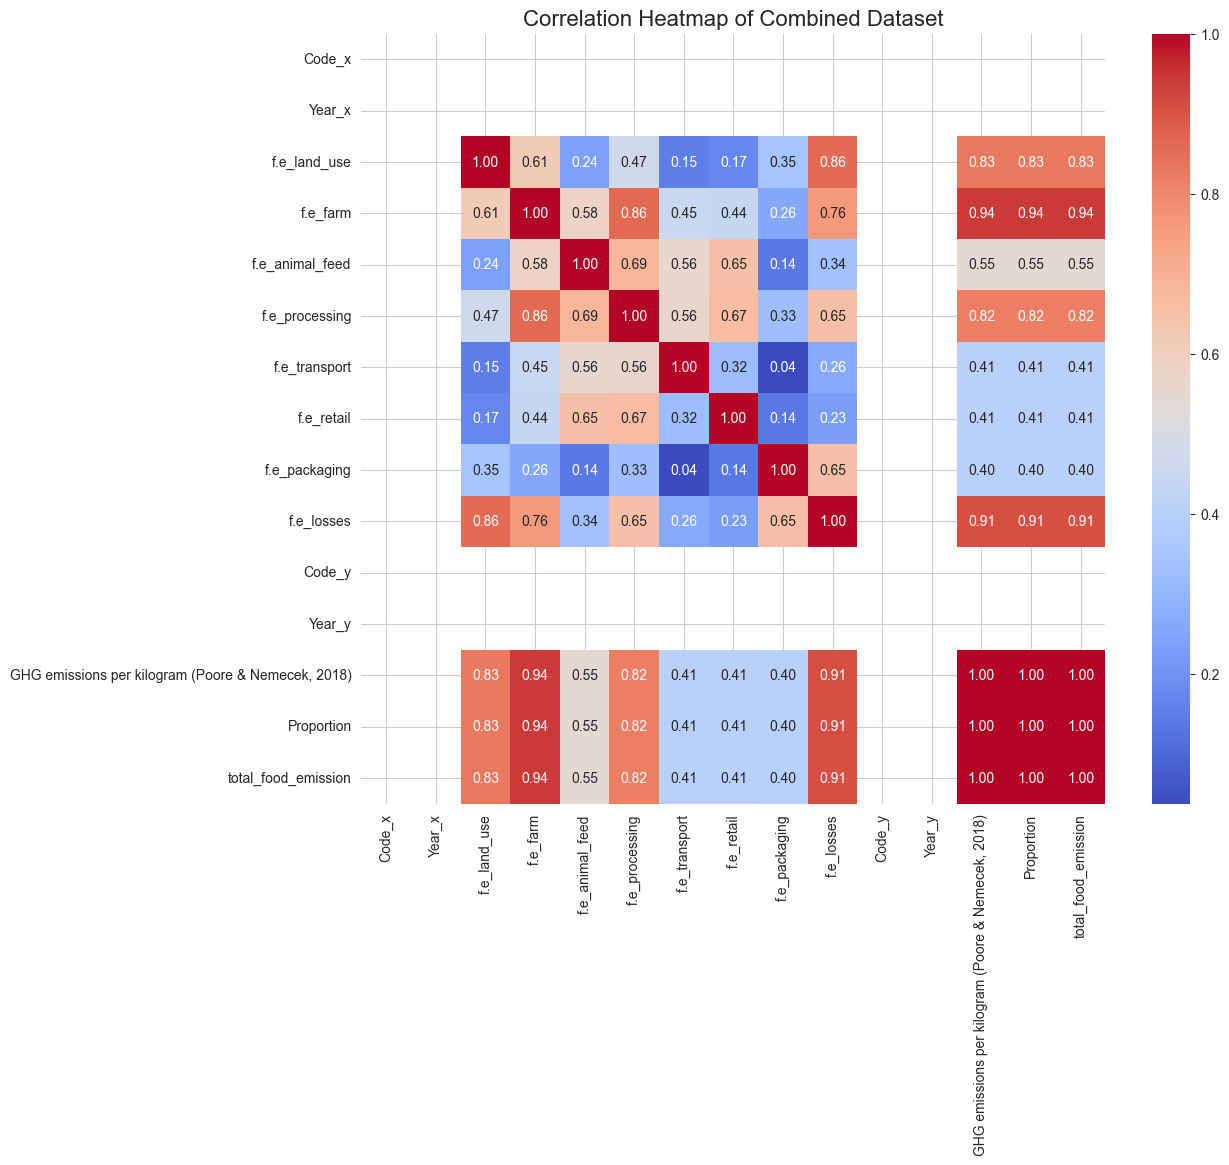

In [39]:
# Select only numeric columns
numeric_cols = combined_df.select_dtypes(include='number')

# Creating correlation matrix
corr_matrix = numeric_cols.corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Combined Dataset', fontsize=16)
plt.show()


In [40]:
combined_df.columns

Index(['Entity', 'Code_x', 'Year_x', 'f.e_land_use', 'f.e_farm',
       'f.e_animal_feed', 'f.e_processing', 'f.e_transport', 'f.e_retail',
       'f.e_packaging', 'f.e_losses', 'Code_y', 'Year_y',
       'GHG emissions per kilogram (Poore & Nemecek, 2018)', 'Proportion',
       'total_food_emission'],
      dtype='object')

In [41]:
# Group the combined dataset by entity and calculate total emissions and GHG emissions
entity_totals = combined_df.groupby('Entity')['GHG emissions per kilogram (Poore & Nemecek, 2018)'].sum().reset_index()

# Display the first few rows of the grouped dataset
print(entity_totals.head())


              Entity  GHG emissions per kilogram (Poore & Nemecek, 2018)
0             Apples                                               0.43 
1            Bananas                                               0.86 
2             Barley                                               1.18 
3   Beef (beef herd)                                              99.48 
4  Beef (dairy herd)                                              33.30 


In [42]:
# Calculate total emissions by summing all emission-related columns
entity_totals['Total Emissions'] = entity_totals[['f.e_land_use', 'f.e_farm', 'f.e_animal_feed', 
                                                   'f.e_processing', 'f.e_transport', 'f.e_retail', 
                                                   'f.e_packaging', 'f.e_losses']].sum(axis=1)

# Set the style of seaborn
sns.set_style('whitegrid')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=entity_totals, x='Entity', y='Total Emissions', color='blue', label='Total Emissions')
sns.barplot(data=entity_totals, x='Entity', y='GHG emissions per kilogram (Poore & Nemecek, 2018)', color='orange', label='GHG Emissions')

# Add labels and title
plt.title('Total Emissions vs GHG Emissions for Each Entity', fontsize=16)
plt.xlabel('Entity', fontsize=14)
plt.ylabel('Emissions', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


KeyError: "None of [Index(['f.e_land_use', 'f.e_farm', 'f.e_animal_feed', 'f.e_processing',\n       'f.e_transport', 'f.e_retail', 'f.e_packaging', 'f.e_losses'],\n      dtype='object')] are in the [columns]"

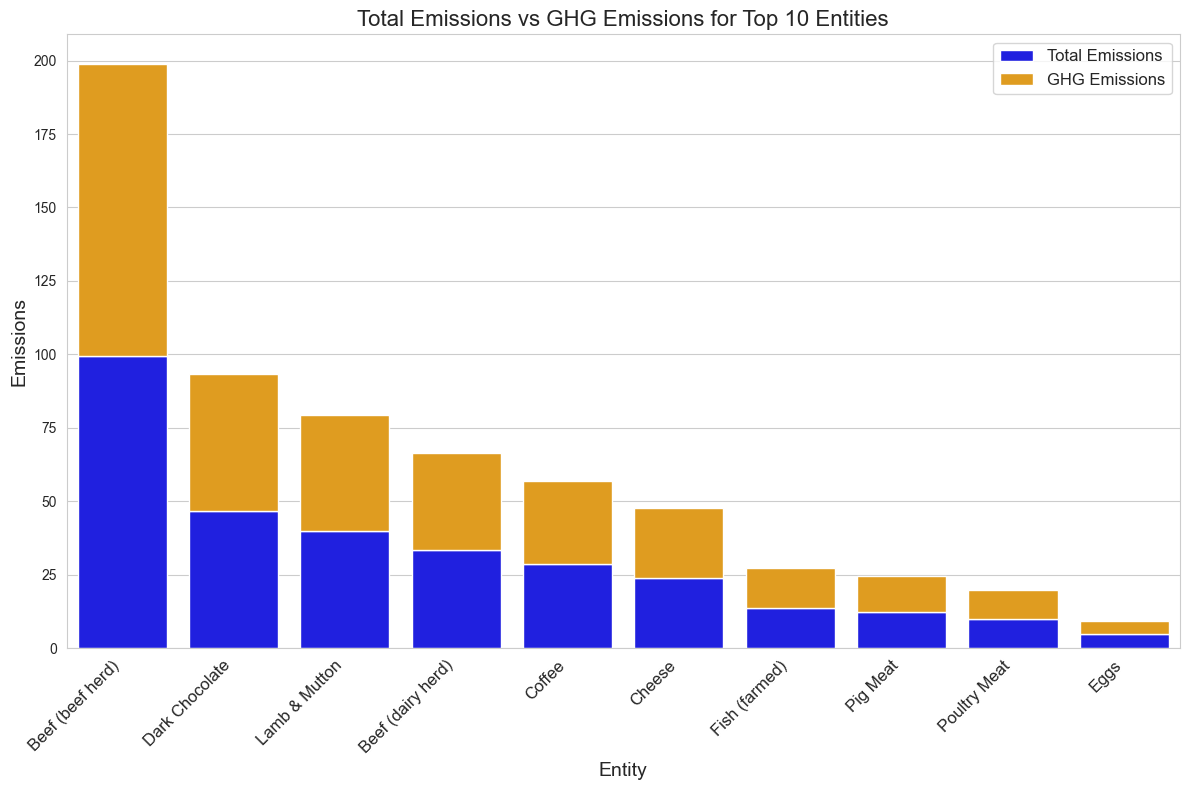

In [ ]:
# Sort the entity_totals DataFrame by 'Total Emissions' column in descending order
top_10_entities = entity_totals.sort_values(by='Total Emissions', ascending=False).head(10)

# Set the style of seaborn
sns.set_style('whitegrid')

# Create the bar plot
plt.figure(figsize=(12, 8))

# Plot total emissions
sns.barplot(data=top_10_entities, x='Entity', y='Total Emissions', color='blue', label='Total Emissions')

# Plot GHG emissions, stacked on top of total emissions
sns.barplot(data=top_10_entities, x='Entity', y='GHG emissions per kilogram (Poore & Nemecek, 2018)', 
            color='orange', label='GHG Emissions', bottom=top_10_entities['Total Emissions'])

# Add labels and title
plt.title('Total Emissions vs GHG Emissions for Top 10 Entities', fontsize=16)
plt.xlabel('Entity', fontsize=14)
plt.ylabel('Emissions', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


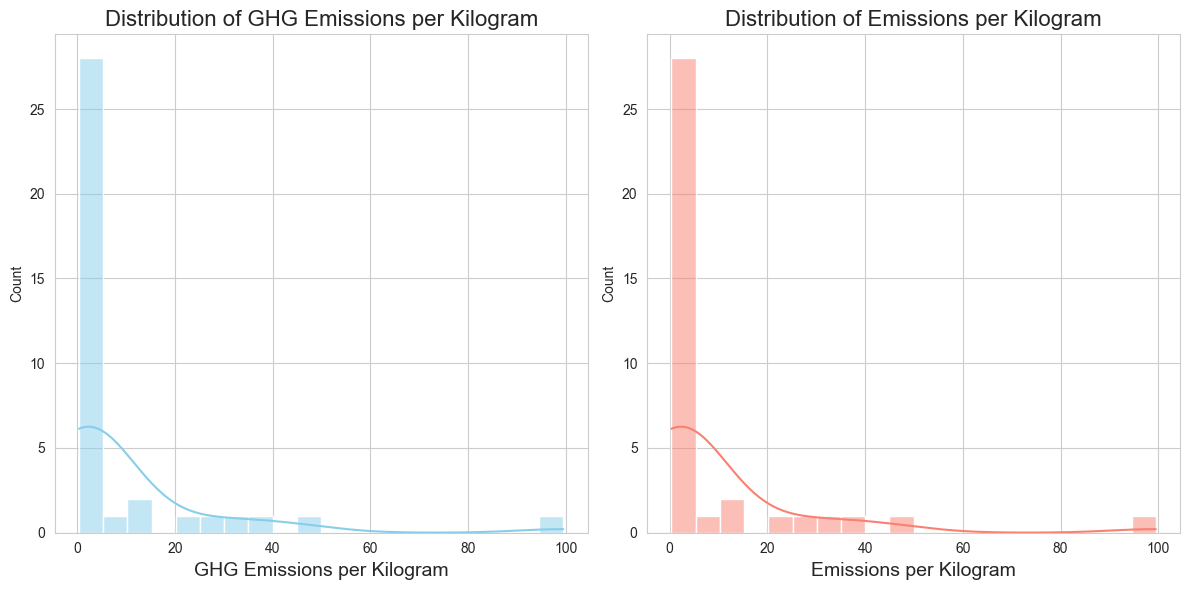

In [ ]:
# Set the style of seaborn
sns.set_style('whitegrid')

# Create subplots for side-by-side histograms
plt.figure(figsize=(12, 6))

# Create histogram for GHG emissions
plt.subplot(1, 2, 1)
sns.histplot(data=combined_df, x='GHG emissions per kilogram (Poore & Nemecek, 2018)', kde=True, bins=20, color='skyblue')
plt.title('Distribution of GHG Emissions per Kilogram', fontsize=16)
plt.xlabel('GHG Emissions per Kilogram', fontsize=14)

# Create histogram for emissions
plt.subplot(1, 2, 2)
sns.histplot(data=combined_df, x='total_food_emission', kde=True, bins=20, color='salmon')
plt.title('Distribution of Emissions per Kilogram', fontsize=16)
plt.xlabel('Emissions per Kilogram', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


## Diet eda

In [49]:
# Step 1: Check Data Types and Missing Values
print(diet.info())
print(diet.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12360 entries, 0 to 12359
Data columns (total 28 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   Entity                                                                                                         12360 non-null  object 
 1   Code                                                                                                           9783 non-null   object 
 2   Year                                                                                                           12360 non-null  int64  
 3   Miscellaneous group | 00002928 || Food available for consumption | 0664pc || kilocalories per day per capita   12193 non-null  float64
 4   Alcoholic Beverages | 00002924 || Food availab

In [50]:
# Step 2: Summary Statistics
print(diet.describe())



               Year  \
count  12360.000000   
mean    1991.459951   
std       17.369891   
min     1961.000000   
25%     1976.000000   
50%     1992.000000   
75%     2007.000000   
max     2020.000000   

       Miscellaneous group | 00002928 || Food available for consumption | 0664pc || kilocalories per day per capita  \
count                                       12193.000000                                                              
mean                                            4.354062                                                              
std                                             9.419602                                                              
min                                             0.000000                                                              
25%                                             0.000000                                                              
50%                                             1.000000                      

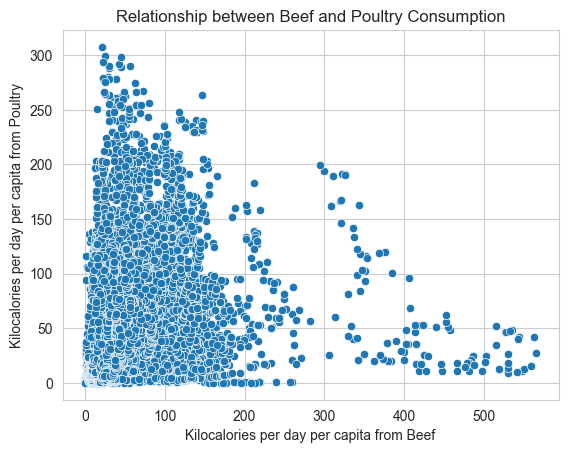

In [52]:
# Step 4: Explore Relationships (Example with scatter plot)
sns.scatterplot(x='Meat, beef | 00002731 || Food available for consumption | 0664pc || kilocalories per day per capita', y='Meat, poultry | 00002734 || Food available for consumption | 0664pc || kilocalories per day per capita', data=diet)
plt.xlabel('Kilocalories per day per capita from Beef')
plt.ylabel('Kilocalories per day per capita from Poultry')
plt.title('Relationship between Beef and Poultry Consumption')
plt.show()

In [8]:
# Merge datasets based on country code
merged_data_diet = pd.merge(diet, countries, left_on="Code", right_on="alpha-3", how="inner")

print(merged_data_diet.head())   


        Entity Code  Year  \
0  Afghanistan  AFG  1961   
1  Afghanistan  AFG  1962   
2  Afghanistan  AFG  1963   
3  Afghanistan  AFG  1964   
4  Afghanistan  AFG  1965   

   Miscellaneous group | 00002928 || Food available for consumption | 0664pc || kilocalories per day per capita  \
0                                                0.0                                                              
1                                                0.0                                                              
2                                                0.0                                                              
3                                                0.0                                                              
4                                                0.0                                                              

   Alcoholic Beverages | 00002924 || Food available for consumption | 0664pc || kilocalories per day per capita  \
0                  

In [16]:
# Define the categories and their corresponding column names
categories = {
    'Meat': ['Meat, Other', 'Meat, sheep and goat', 'Meat, pig', 'Meat, poultry', 'Meat, beef'],
    'Fish and Seafood': ['Fish and seafood'],
    'Dairy': ['Milk', 'Eggs'],
    'Oils': ['Vegetable Oils', 'Oilcrops'],
    'Sugar and Sweeteners': ['Sugar crops', 'Sugar & Sweeteners'],
    'Starchy Foods': ['Starchy Roots', 'Maize', 'Rice', 'Wheat'],
    'Nuts': ['Nuts'],
    'Fruits and Vegetables': ['Fruits - Excluding Wine', 'Stimulants', 'Alcoholic Beverages', 'Fruits, Other', 'Roots & Tubers', 'Vegetables', 'Pulses'],
    'Miscellaneous': ['Miscellaneous'],
    'Alcoholic Beverages': ['Alcoholic Beverages'],
}

# Reverse mapping to get a dictionary of column names as keys and their corresponding category as values
column_to_category = {col: category for category, cols in categories.items() for col in cols}

# Group the columns based on categories
grouped_diet = diet.groupby(column_to_category, axis=1).sum()

# Display the grouped diet DataFrame
print(grouped_diet)


/var/folders/sv/dz4jmj192cz4j_zk2nzd1vqw0000gn/T/ipykernel_6428/3919917004.py:19: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  grouped_diet = diet.groupby(column_to_category, axis=1).sum()


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[12360 rows x 0 columns]


In [ ]:
# Merge datasets based on country code
merged_data = pd.merge(diet, countries, left_on="Code", right_on="alpha-3", how="inner")

# Define the desired categories of food products
categories = {
    "Meat": ["Meat, Other", "Meat, sheep and goat", "Meat, pig", "Meat, poultry", "Meat, beef"],
    "Fish": ["Fish and seafood"],
    "Vegetables": ["Vegetable Oils", "Oilcrops", "Starchy Roots"],
    "Fruits": ["Sugar crops", "Sugar & Sweeteners"],
    "Dairy": ["Milk"],
    "Nuts": ["Nuts"],
    # Add more categories as needed
}

# Group dietary composition data by continent and categories
grouped_data = merged_data.groupby(["region"] + list(categories.keys()))[categories.values()].mean()

# Plot
plt.figure(figsize=(12, 8))
for continent, data in grouped_data.groupby(level=0):
    data = data.droplevel(0)  # Drop the continent level for plotting
    for category, columns in categories.items():
        plt.plot(data.index, data[columns].sum(axis=1), label=f"{continent} - {category}")

plt.xlabel('Year')
plt.ylabel('Kilocalories per day per capita')
plt.title('Dietary Composition by Continent and Food Category')
plt.legend()
plt.show()
